# USA Mercedes Benz Prices Analysis Report
#### Dataset link: https://www.kaggle.com/datasets/danishammar/usa-mercedes-benz-prices-dataset/data
## Introduction

### This report analyzes the USA Mercedes Benz prices dataset, which contains information about various Mercedes Benz car models, including their prices, mileage, ratings, and review counts. The goal of this analysis is to explore the relationships between these variables and identify patterns and trends in the data.

## Importing Libraries and Loading Data

### In this section, we import the necessary libraries and load the dataset.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import AgglomerativeClustering

path = 'E:/DATASETS/usa_mercedes_benz_prices.csv'
df = pd.read_csv(path)

## Data Preprocessing

### In this section, we perform data preprocessing tasks such as stripping and titling the Name column, converting Mileage and Price columns to numeric values, and dropping rows with missing values in the Review Count column.

In [13]:
print(df.dtypes)

df['Name'] = df['Name'].str.strip()
df['Name'] = df['Name'].str.title()
df['Name'] = df['Name'].astype('string')
df['Mileage'] = df['Mileage'].str.replace(',', '').str.replace(' mi.', '').astype(float)
df['Price'] = df['Price'].str.replace(',', '').str.replace('$', '')
df['Price'] = df['Price'].replace('Not Priced', np.nan).astype(float)
df = df.dropna(subset=['Review Count'])
df['Review Count'] = df['Review Count'].str.replace(',', '').astype(int)

print(df.dtypes)

Name             object
Mileage          object
Rating          float64
Review Count     object
Price            object
dtype: object
Name            string[python]
Mileage                float64
Rating                 float64
Review Count             int64
Price                  float64
dtype: object


             Mileage       Rating  Review Count          Price
count    2398.000000  2135.000000   2398.000000    2397.000000
mean    20151.801501     4.533724   1267.143036   56036.508552
std     17816.241483     0.386506   1261.300025   31502.901985
min       100.000000     2.100000      0.000000    8999.000000
25%      5901.500000     4.400000    344.000000   38098.000000
50%     14061.500000     4.600000    919.000000   46977.000000
75%     31214.500000     4.800000   1800.000000   61998.000000
max    194043.000000     5.000000   7140.000000  229918.000000


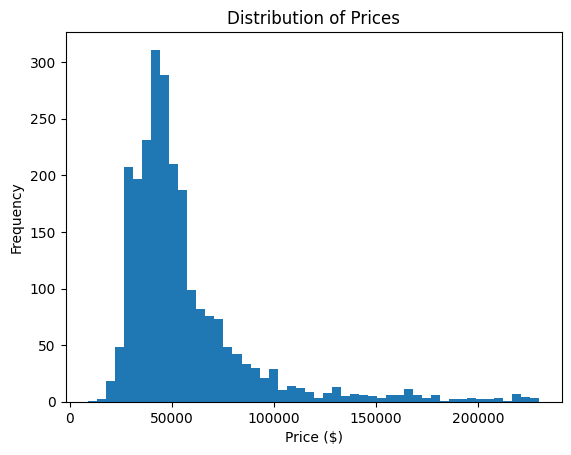

In [14]:
print(df.describe())

plt.hist(df['Price'], bins=50)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

###  The histogram shows a peak around $20,000, indicating that many cars are priced around this value.

## Scatter Plot

### In this section, we create a scatter plot to visualize the relationship between Mileage and Price with different colors for different Rating values.

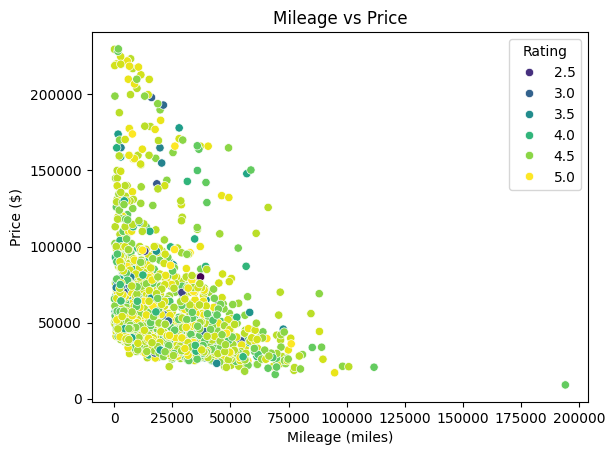

In [15]:
sns.scatterplot(x='Mileage', y='Price', hue='Rating', data=df, palette='viridis')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price ($)')
plt.title('Mileage vs Price')
plt.legend(title='Rating')
plt.show()

### The scatter plot shows a positive correlation between Mileage and Price, indicating that as the mileage increases, the price of the car also tends to increase.

## Correlation Matrix

### In this section, we create a correlation matrix to visualize the relationships between numeric columns.

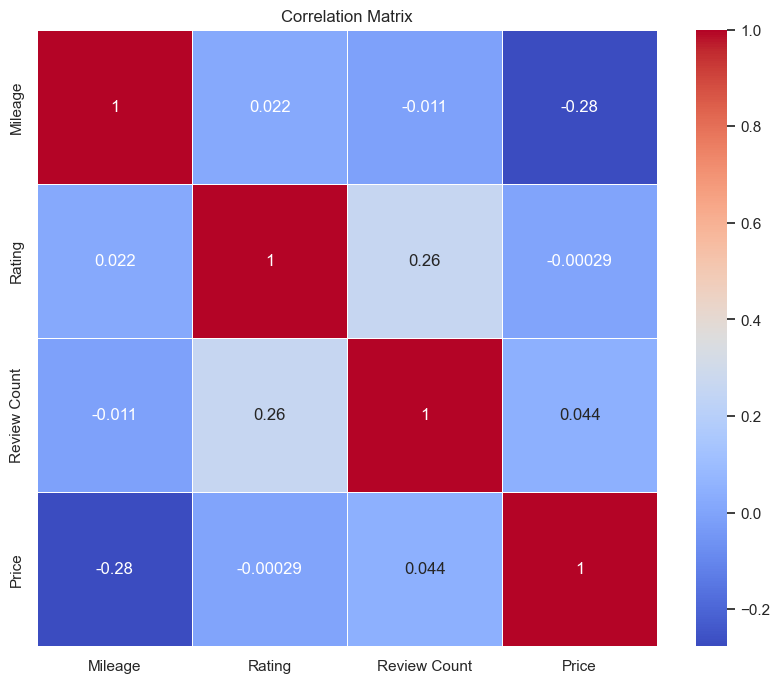

In [16]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

sns.set()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Positive correlations: A positive correlation (closer to 1) indicates that as one variable increases, the other variable also tends to increase.
### Negative correlations: A negative correlation (closer to -1) indicates that as one variable increases, the other variable tends to decrease.
### Weak correlations: Correlations close to 0 indicate a weak relationship between the variables.

## Clustering

### In this section, we perform agglomerative clustering on the Mileage, Price, and Rating features and visualize the clusters.

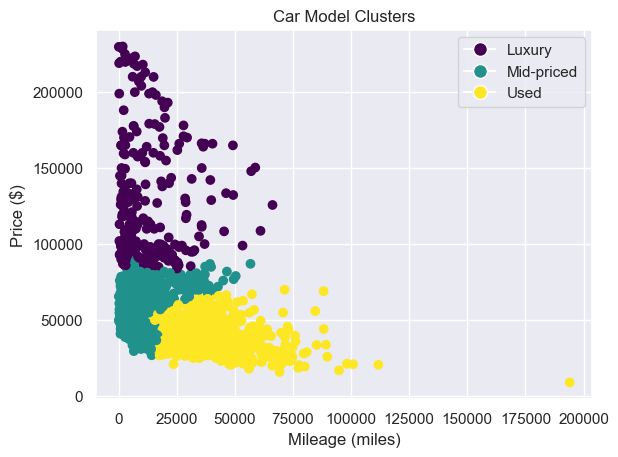

In [17]:
df.dropna(inplace=True)

features = ['Mileage', 'Price', 'Rating']

agg_cluster = AgglomerativeClustering(n_clusters=3)
cluster_labels = agg_cluster.fit_predict(df[features])
plt.scatter(df['Mileage'], df['Price'], c=cluster_labels, cmap='viridis')
legend_handles = [
        plt.Line2D([0], [0], marker='o', color='w', label='Luxury', markerfacecolor=plt.cm.viridis(0), markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Mid-priced', markerfacecolor=plt.cm.viridis(0.5),
                   markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Used', markerfacecolor=plt.cm.viridis(1.0), markersize=10)]

plt.legend(handles=legend_handles, loc='upper right')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price ($)')
plt.title('Car Model Clusters')
plt.show()

### Luxury (blue): This cluster consists of cars with high prices (> $30,000) and relatively low mileage (< 50,000 miles). These cars are likely to be high-end models with advanced features.

### Mid-priced (green): This cluster includes cars with moderate prices (between $15,000 and $30,000) and mileage (between 50,000 and 80,000 miles). These cars are likely to be mid-range models with standard features.

### Used (yellow): This cluster comprises cars with low prices (< $15,000) and high mileage (> 80,000 miles). These cars are likely to be older models or those with high usage.